In [1]:
%load_ext watermark
%watermark -a Chan -d -v -p sqlite3,pandas

Chan 2019-08-02 

CPython 3.7.3
IPython 7.6.1

sqlite3 2.6.0
pandas 0.24.2


In [2]:
import sqlite3
import pandas as pd

# Load Dataset

In [409]:
conn = sqlite3.connect('./africa.db')
cur = conn.cursor()

In [410]:
cur.execute("""
    SELECT * FROM chat WHERE url_id=37089981;
""")
conn.commit()

In [411]:
a_data = pd.DataFrame(cur.fetchall(), columns=['id', 'chat', 'userid', 'timestamp','url'])

In [416]:
a_data.set_index('id',inplace=True)
a_data.timestamp = a_data.timestamp.astype('float')
a_data['label'] = 1
a_data.head()

,chat,userid,timestamp,url,label
id,,,,,
3134,뭐야,j1237538,2.134,37089981,1
3135,아,mshr1010,2.134,37089981,1
3136,개노잼,ghdwo1211,2.134,37089981,1
3137,어휴,jjh1231006(3),2.134,37089981,1
3138,ㄴㅈ,asc1408,2.134,37089981,1


In [417]:
cur.execute("""
    SELECT * FROM chat WHERE url_id=10212373;
""")
conn.commit()
b_data = pd.DataFrame(cur.fetchall(), columns=['id', 'chat', 'userid', 'timestamp','url'])
b_data.set_index('id',inplace=True)
b_data.timestamp = b_data.timestamp.astype('float')
b_data['label'] = 0
b_data.head()

,chat,userid,timestamp,url,label
id,,,,,
1,이청아씨,sully3,1.089,10212373,0
2,축하드려여 대도님 ㅎㅎ 항상잘보고있어요 팬가입못해서죄송해여 ㅠㅠ,wsxee44,1.757,10212373,0
3,이청아가 남자들이 진짜 좋아하는 스탈이래여,zndnzndn11,2.215,10212373,0
4,역시 배우는 다르더라구요,ghdtndus1004(2),2.668,10212373,0
5,ㅋㅋ,zndnzndn11,3.028,10212373,0


In [418]:
data = pd.concat([a_data, b_data])

In [434]:
len(a_data), len(b_data)

(47983, 3133)

In [419]:
cur.close()
conn.close()

ProgrammingError: Cannot operate on a closed database.

# 단어사전 생성
## 형태소 분석

In [420]:
from konlpy.tag import Okt

In [421]:
okt = Okt()

In [422]:
from tqdm import tqdm

> normalize만 수행. Stemming은 채팅데이터 부적절하다
> 
> - ex) 씹 -> 씹다(verb)로 변형됨

In [423]:
tokens = [okt.pos(_, norm=True,stem=True) for _ in tqdm(data.chat)]

100%|███████████████████████████████████████████████████████████████████████████| 51116/51116 [00:55<00:00, 925.44it/s]


In [424]:
tokens[-20:]

[[('ㅂㅂㅏ', 'KoreanParticle')],
 [('뿅', 'Adverb'), ('ㅇ', 'KoreanParticle')],
 [('뿅', 'Adverb'), ('~~', 'Punctuation')],
 [('수고', 'Noun'), ('하다', 'Verb')],
 [('뿅', 'Adverb')],
 [('뿅', 'Adverb')],
 [('들어가다', 'Verb'), ('!', 'Punctuation')],
 [('굿밤', 'Noun'), ('되다', 'Verb')],
 [('뿅', 'Adverb')],
 [('ㅂㅂㅂ', 'KoreanParticle')],
 [('ㅂ', 'KoreanParticle'), ('밥바', 'Noun')],
 [('내일', 'Noun'),
  ('뵈다', 'Verb'),
  ('!!', 'Punctuation'),
  (':)', 'Punctuation')],
 [('어여', 'Adverb'),
  ('주무시다', 'Verb'),
  ('가세', 'Noun'),
  ('유', 'Noun'),
  (';', 'Punctuation'),
  ('ㅅ', 'KoreanParticle'),
  (';)/', 'Punctuation')],
 [('안녕하다', 'Adjective'), ('주무', 'Noun'), ('세', 'Noun'), ('요', 'Josa')],
 [('~', 'Punctuation')],
 [('잘', 'VerbPrefix'), ('자다', 'Verb'), ('~', 'Punctuation')],
 [('늘', 'Noun'), ('고맙다', 'Adjective'), ('~', 'Punctuation')],
 [('상', 'Noun'), ('감사', 'Noun'), ('드리다', 'Verb'), ('~', 'Punctuation')],
 [('잘', 'VerbPrefix'), ('자다', 'Verb'), ('~', 'Punctuation')],
 [('뿅', 'Adverb')]]

### 품사별로 살펴보기

In [425]:
from collections import defaultdict
from collections import Counter

Noun, Foreign, KoreanParticle 만 사용한다. 나머지는 크게 의미 없음

In [426]:
clean_tokens = []
for _ in tokens:
    clean_tokens.append([__[0] for __ in _ ])

[_ for _ in clean_tokens if len(_)>3]

[['이기광', '무러해', '도', '노잼'],
 ['이', '새', '기', '가'],
 ['아', '진짜', '방송', '감'],
 ['가연', '이', '임신', '함', '?'],
 ['쟤', '좀', '집', '에', '보내다', ';;'],
 ['저러다', '하꼬', '지', 'ㅅㅂ'],
 ['이기광', '저러다', '학', '꽂다', '비'],
 ['하하', 'ㅏ', '핳', '....'],
 ['진짜', '개', '노잼', '이다'],
 ['나가다', '졋우', '면', '..'],
 ['노잼', '새다', '끄다', '저'],
 ['가연', '이', '임신', '함', '?'],
 ['이기광', '저', '놈', '감', '없다'],
 ['여기', '서', '끝내다', 'ㅇㅈ'],
 ['쟤좀', '집', '에', '보내다', ';;;;;;'],
 ['아', '기광', '이', '방송', '개', '노잼', '만', '드', '네'],
 ['머', '중이', '개', '노잼'],
 ['하진', '짜다', '감', '없다'],
 ['zzzzzzz', '아니다', '존', 'ㄴ', 'ㅏ', '대단하다'],
 ['대다', 'ㅡㅡㅡ', '차다', 'ㅡㅡ', '사'],
 ['용다', '곱', '게', '탈출', '하다'],
 ['개', '노잼', '하다', '실패하다', '얒'],
 ['아', 'ㅇ', 'ㄱ', 'ㄱ', 'ㅂ', 'ㄹ'],
 ['이기광', '여전하다', '개', '노잼', '이네'],
 ['오다', '진짜', '개', '노잼', '이다'],
 ['나가다', '졋으', '면', 'ㅇㄱㄱ', '시발'],
 ['진짜', '개', '노잼', '이네', 'ㅋㅋㅋ'],
 ['끼후', '이', '잘', '하다'],
 ['이기광', '답', '다', 'ㅅㅂ'],
 ['오다', '진짜', 'ㄱ', 'ㅐ', '노잼', '이네'],
 ['오다', '...', '개', '노잼', '만들다', '버리다', '이기광', '....'],
 ['저', '래서', '

In [427]:
clean_tokens = []
for _ in tokens:
    clean_tokens.append([__[0] for __ in _ if __[1] in ['Noun', 'KoreanParticle', 'Foreign']])
[_ for _ in clean_tokens if len(_)>3]

[['기광', '방송', '개', '노잼', '드'],
 ['머', '중이', '개', '노잼'],
 ['ㅇ', 'ㄱ', 'ㄱ', 'ㅂ', 'ㄹ'],
 ['진짜', '개', '노잼', 'ㅋㅋㅋ'],
 ['진짜', 'ㄱ', 'ㅐ', '노잼'],
 ['노노', '노잼', '잼잼', 'ㅈ'],
 ['이기광', '요새', '살', '만하'],
 ['노잼', '진짜', '이기광', 'ㅋㅋ'],
 ['이기광', '시발', '기', '다망'],
 ['ㄴ', 'ㅏ', 'ㄱ', 'ㅏ'],
 ['머', '중이', '개', '노잼', '키'],
 ['이기광', 'ㅄ', '색기', '개', '노잼'],
 ['ㅇ', 'ㄱ', 'ㄱ', 'ㅂ', 'ㄹ'],
 ['머', '중이', '집', '좀'],
 ['ㅈㄴ', 'ㄴㅈ', '마이너', '하꼬'],
 ['ㅇ', 'ㄱ', 'ㄱ', 'ㅂ', 'ㄹ'],
 ['이기광', '방송', '망치', 'ㅡㅡ'],
 ['이기광', '때문', '개', '노잼'],
 ['이기광', '진짜', '공구리', '개', '노잼', '시발'],
 ['이기광', '그냥', '제발', 'ㅠㅠㅠ'],
 ['ㅇ', 'ㄱ', 'ㄱ', 'ㅂ', 'ㄹ'],
 ['ㅇ', 'ㄱ', 'ㄱ', 'ㅂ', 'ㄹ'],
 ['여기', '토', '식도', '아작'],
 ['마지막방송', '별로', '내', 'ㅋㅋㅋ'],
 ['ㅋㅋㅋ', '뒤', '풀이', 'ㅋㅋㅋ'],
 ['이기광', '개', '이득', '여서', '방송', '떡'],
 ['ㅇ', 'ㄱ', 'ㄱ', 'ㅂ', 'ㄹ'],
 ['ㅇ', 'ㄱ', 'ㄱ', 'ㅂ', 'ㄹ'],
 ['킹', 'ㅡㅡㅡ', '기', 'ㅡㅡㅡ', '훈'],
 ['이기광', '좀', '제발', '좀', 'ㅠㅠㅠ'],
 ['ㅇ', 'ㄱ', 'ㄱ', 'ㅂ', 'ㄹ'],
 ['★', '철', '구형', '추천', '즐', '\n', '★', '철', '튜브', '구독', '알람', '\n'],
 ['이기광', 'ㅁ', '진짜', '노잼'],
 ['머', '중이', '실

In [428]:
counter = Counter()
for _ in clean_tokens:
    counter.update(_)

print('고빈도 단어')
most_common = counter.most_common()[:50]
for k, v in most_common:
    print(k, ": ", v)

고빈도 단어
ㅋㅋㅋ :  8599
ㅅㅇㅇ :  3674
ㅋㅋ :  1305
이기광 :  1210
업 :  1012
ㄱㄱㅇ :  719
ㅇㅈ :  712
뽀뽀 :  707
오 :  624
ㅇㄱㄱㅂㄹ :  587
ㄴㅈ :  551
ㅋ :  547
노잼 :  538
남자 :  489
개 :  480
ㅡㅡ :  442
입 :  425
기광 :  412
ㅡㅡㅡ :  391
여드름 :  385
더 :  355
용이 :  347
ㄲㅈ :  333
광업 :  328
ㅅ :  326
세 :  321
응 :  299
ㅅㅅㅅ :  296
손 :  294
민심 :  287
누가 :  281
오우 :  279
방송 :  278
ㄱ :  270
대도 :  270
봉투 :  266
ㅏ :  252
ㅇ :  250
♡ :  243
머 :  241
ㄴ :  240
진짜 :  239
ㄱㄱ :  239
뭐 :  235
명 :  235
오우야 :  235
역배 :  228
해 :  225
그냥 :  218
볼뽀뽀 :  218


In [429]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [430]:
wc= WordCloud(font_path='C:Windows/Fonts/NanumGothic.ttf',
              width = 800,
              height = 800,
              background_color='white').generate(str(clean_tokens))

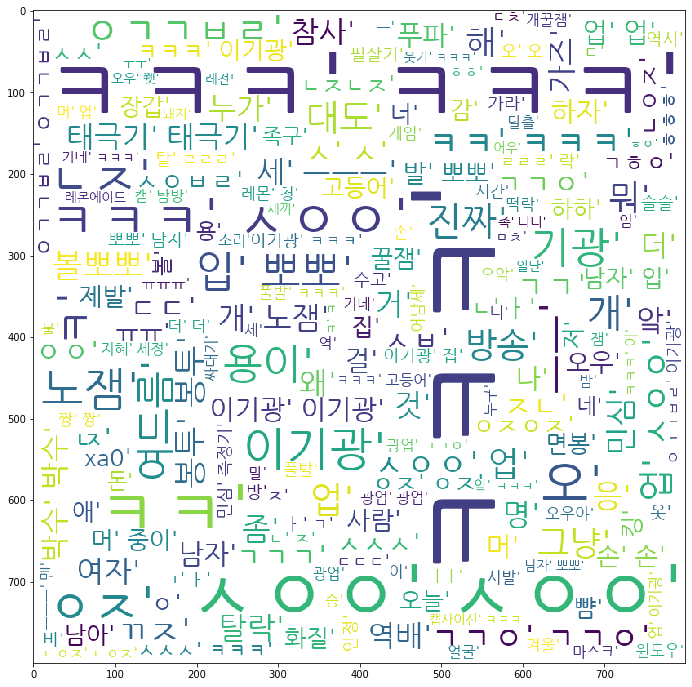

In [431]:
plt.figure(figsize=(12,12))
plt.imshow(wc);

In [432]:
vocab_size = 5000

pad_id = 0
oov_id = 1
index_offset = 1

vocab = {
      '<PAD>': pad_id,
      '<OOV>': oov_id
}
for i, (word, cnt) in enumerate(most_common, start=index_offset+1):
    vocab[word] = i
    if len(vocab) >= vocab_size:
        break

word_index = vocab
word_inverted_index = {v:k for k, v in word_index.items()}

print("\n단어 사전:")
for i in range(0, 10):
    print(i, word_inverted_index[i])
print("\n단어 사전 크기: ", len(word_index))


단어 사전:
0 <PAD>
1 <OOV>
2 ㅋㅋㅋ
3 ㅅㅇㅇ
4 ㅋㅋ
5 이기광
6 업
7 ㄱㄱㅇ
8 ㅇㅈ
9 뽀뽀

단어 사전 크기:  52


In [433]:
def index_to_text(indexes):
    return ' '.join([word_inverted_index[i] for i in indexes])
  
def text_to_index(text):
    indexes = []
    for tok in text:
        if tok in word_index:
            indexes.append(word_index[tok])
        else:
            indexes.append(oov_id)

    return indexes

print("원본: ", clean_tokens[16])
ids = text_to_index(clean_tokens[16])
print("문자 -> 숫자: ", ids)
print("숫자 -> 문자: ", index_to_text(ids))

원본:  ['이기광', '무러해', '노잼']
문자 -> 숫자:  [5, 1, 14]
숫자 -> 문자:  이기광 <OOV> 노잼


In [435]:
x_variable = [text_to_index(tok) for tok in clean_tokens]

sentence_size = 10
x_padded = sequence.pad_sequences(x_variable,
                                 maxlen=sentence_size,
                                 truncating='post',
                                 padding='post',
                                 value=pad_id)

n_test = len(data) // 10
test_inputs = x_padded[:n_test]
train_inputs = x_padded[n_test:]

ys = np.array(data["Normalized Score"].tolist())
test_labels = ys[:n_test]
train_labels = ys[n_test:]

print("test_inputs shape: ", test_inputs.shape)
print("train_inputs shape: ", train_inputs.shape)
print("test_labels shape: ", test_labels.shape)
print("train_labels shape: ", train_labels.shape)

NameError: name 'sequence' is not defined